In [1]:
import pandas as pd
import numpy as np


In [3]:
dune_2_reviews_df = pd.read_csv(r'C:\Users\user\Desktop\dune_2_review\dune_2_reviews.csv')

In [5]:
dune_2_reviews_df.head()

,Review Title,Review Date,Review Content,User Rating
0,This is what Hollywood needs!\n,2024-02-26,This is what Hollywood needs. A great story wi...,10.0
1,Long live the fighters\n,2024-02-26,Phenomenal stuff. I'll probably calm down tomo...,9.0
2,Ladies and gentleman.. the PEAK of filmmaking...,2024-02-28,This is the kind of movie that is impossible t...,10.0
3,WOW! I need Dune Messiah now.\n,2024-02-26,"If you liked or loved the first one, the same ...",10.0
4,The Sci-Fi/Fantasy Epic of our Generation\n,2024-02-26,Had the pleasure to watch this film in an earl...,10.0


In [6]:
dune_2_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    1066 non-null   object 
 1   Review Date     1066 non-null   object 
 2   Review Content  1066 non-null   object 
 3   User Rating     1056 non-null   float64
dtypes: float64(1), object(3)
memory usage: 33.4+ KB


In [7]:
dune_2_reviews_df.describe(include='all')

,Review Title,Review Date,Review Content,User Rating
count,1066,1066,1066,1056.000000
unique,1031,10,1065,NaN
top,Masterpiece\n,2024-03-02,I couldn't see Christopher Walken as embodying...,NaN
freq,9,225,2,NaN
mean,NaN,NaN,NaN,8.579545
std,NaN,NaN,NaN,2.148805
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,8.000000
50%,NaN,NaN,NaN,10.000000
75%,NaN,NaN,NaN,10.000000


In [9]:
# Data Cleaning Tasks

# Convert 'Review Date' to datetime
dune_2_reviews_df['Review Date'] = pd.to_datetime(dune_2_reviews_df['Review Date'])

# Handle missing values in 'User Rating' by filling them with the median rating
median_rating = dune_2_reviews_df['User Rating'].median()
dune_2_reviews_df['User Rating'].fillna(median_rating, inplace=True)

# Verify changes
dune_2_reviews_df.info(), dune_2_reviews_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Review Title    1066 non-null   object        
 1   Review Date     1066 non-null   datetime64[ns]
 2   Review Content  1066 non-null   object        
 3   User Rating     1066 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 33.4+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_13784\938048896.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dune_2_reviews_df['User Rating'].fillna(median_rating, inplace=True)


(None,
           Review Title                    Review Date  \
 count             1066                           1066   
 unique            1031                            NaN   
 top      Masterpiece\n                            NaN   
 freq                 9                            NaN   
 mean               NaN  2024-03-01 23:51:53.696060160   
 min                NaN            2024-02-26 00:00:00   
 25%                NaN            2024-03-01 00:00:00   
 50%                NaN            2024-03-02 00:00:00   
 75%                NaN            2024-03-03 00:00:00   
 max                NaN            2024-03-06 00:00:00   
 std                NaN                            NaN   
 
                                            Review Content  User Rating  
 count                                                1066  1066.000000  
 unique                                               1065          NaN  
 top     I couldn't see Christopher Walken as embodying...          NaN  

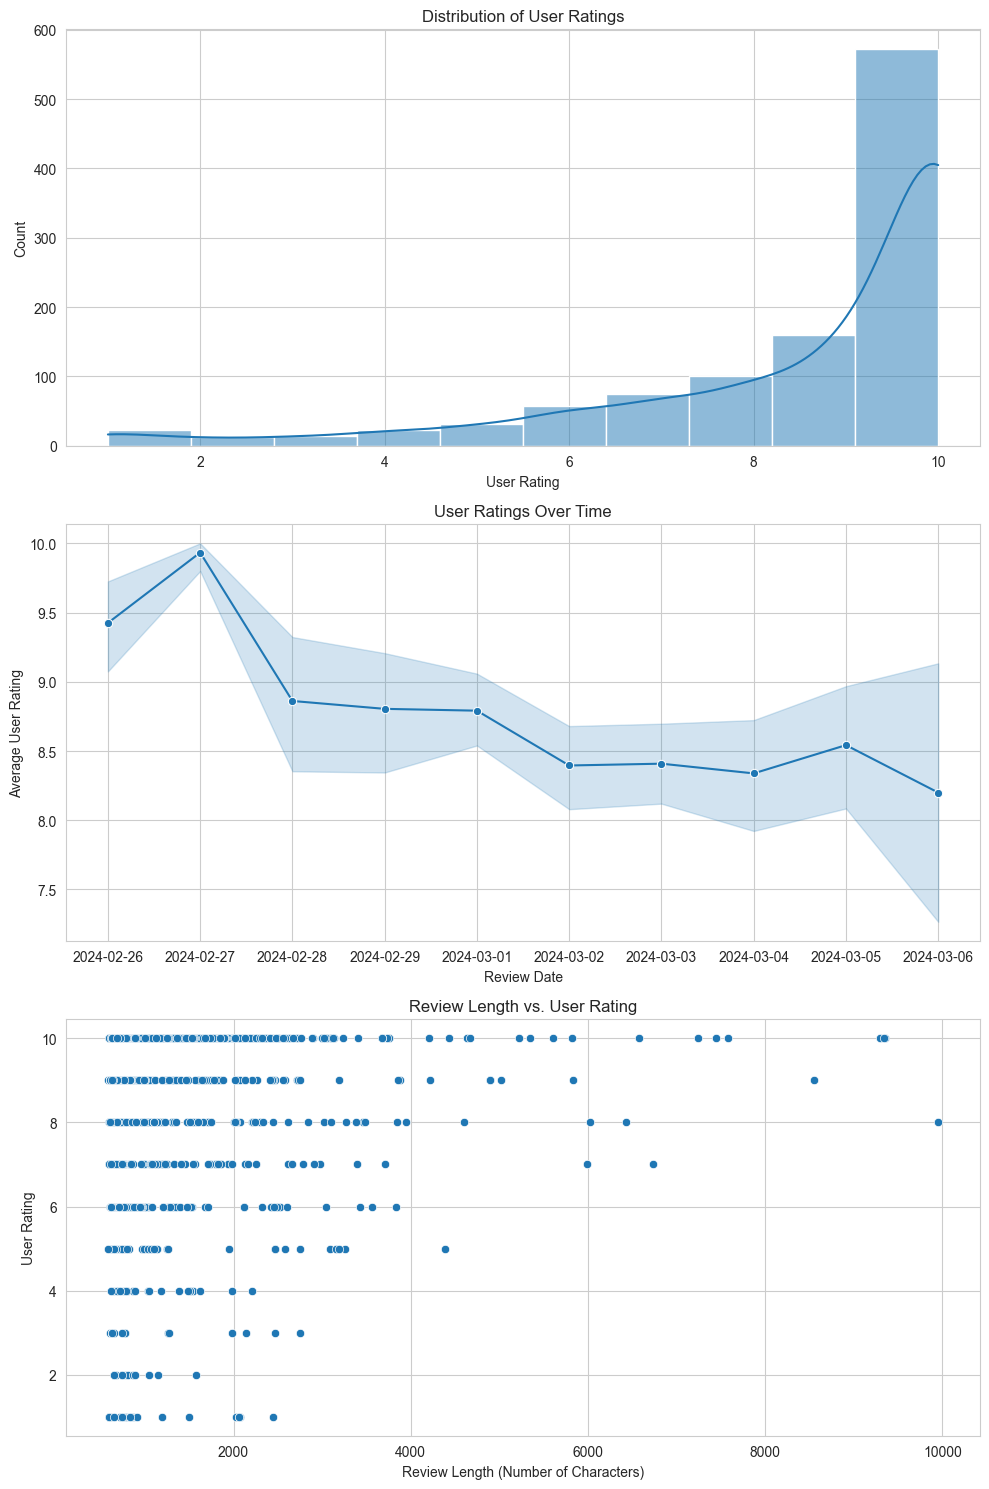

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure to hold our plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Distribution of User Ratings
sns.histplot(dune_2_reviews_df['User Rating'], bins=10, kde=True, ax=axs[0])
axs[0].set_title('Distribution of User Ratings')
axs[0].set_xlabel('User Rating')
axs[0].set_ylabel('Count')

# Plot 2: Ratings Over Time
sns.lineplot(x='Review Date', y='User Rating', data=dune_2_reviews_df, ax=axs[1], marker='o')
axs[1].set_title('User Ratings Over Time')
axs[1].set_xlabel('Review Date')
axs[1].set_ylabel('Average User Rating')
axs[1].grid(True)

# Plot 3: Relationship Between Review Length and User Rating
dune_2_reviews_df['Review Length'] = dune_2_reviews_df['Review Content'].apply(len)
sns.scatterplot(x='Review Length', y='User Rating', data=dune_2_reviews_df, ax=axs[2])
axs[2].set_title('Review Length vs. User Rating')
axs[2].set_xlabel('Review Length (Number of Characters)')
axs[2].set_ylabel('User Rating')

plt.tight_layout()
plt.show()


Distribution: How are the user ratings distributed?

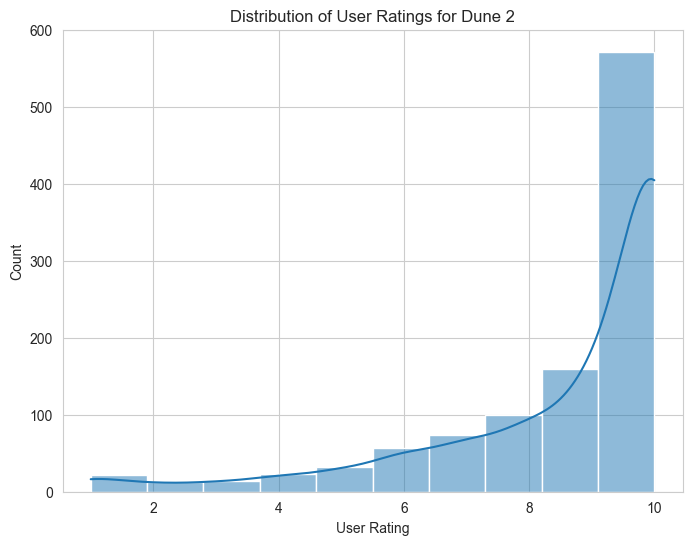

In [12]:

plt.figure(figsize=(8, 6))

# Plotting the distribution of user ratings
sns.histplot(dune_2_reviews_df['User Rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings for Dune 2')
plt.xlabel('User Rating')
plt.ylabel('Count')
plt.grid(True)

# Displaying the plot
plt.show()


Rating Over Time: How do ratings change over time?

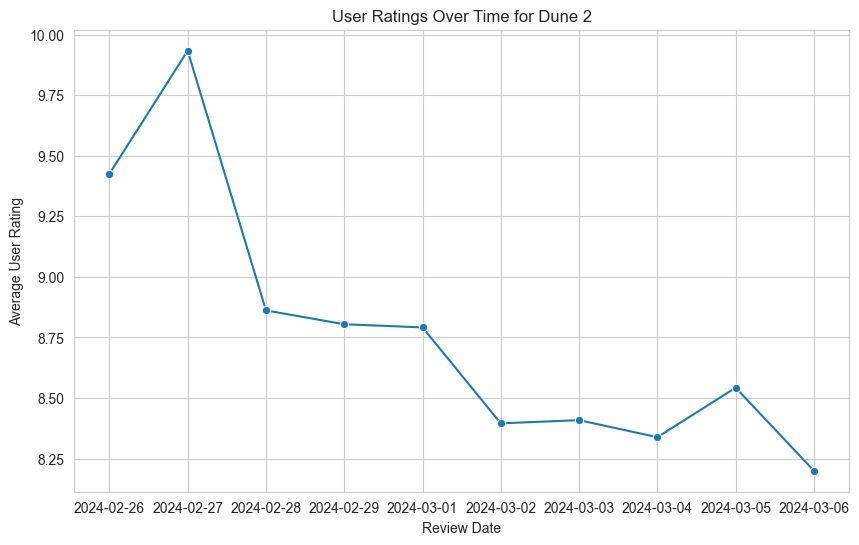

In [14]:
# Creating a graph for the rating changes over time

# Grouping the data by 'Review Date' and calculating the mean 'User Rating' for each date
ratings_over_time = dune_2_reviews_df.groupby('Review Date')['User Rating'].mean().reset_index()

# Setting up the plot
plt.figure(figsize=(10, 6))

# Plotting the ratings over time
sns.lineplot(data=ratings_over_time, x='Review Date', y='User Rating', marker='o')
plt.title('User Ratings Over Time for Dune 2')
plt.xlabel('Review Date')
plt.ylabel('Average User Rating')
plt.grid(True)

# Displaying the plot
plt.show()


  Word Count Analysis: How does the length of the review content correlate with the user rating?

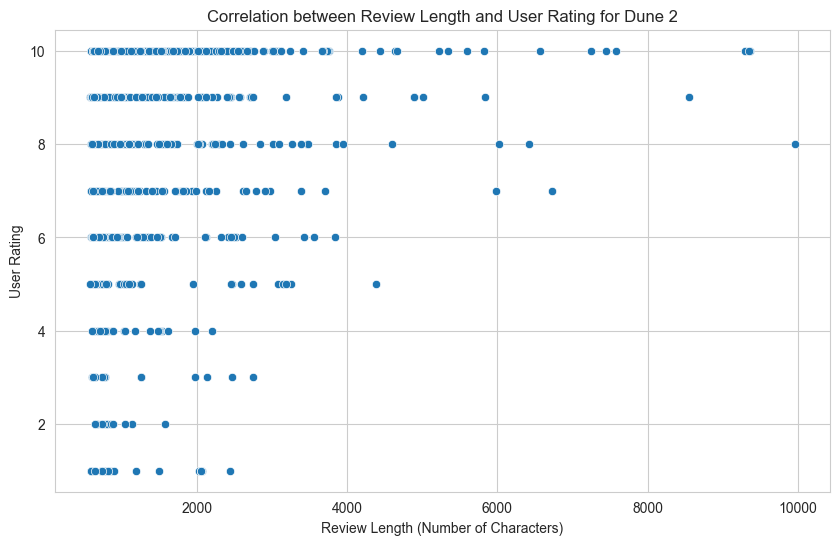

In [15]:
# Creating a graph for the correlation between review length and user rating

# Calculating the length of each review
dune_2_reviews_df['Review Length'] = dune_2_reviews_df['Review Content'].str.len()

# Setting up the plot
plt.figure(figsize=(10, 6))

# Plotting review length vs. user rating
sns.scatterplot(data=dune_2_reviews_df, x='Review Length', y='User Rating')
plt.title('Correlation between Review Length and User Rating for Dune 2')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('User Rating')
plt.grid(True)

# Displaying the plot
plt.show()


User Rating: The rating given by the user, ranging from 1 to 10.

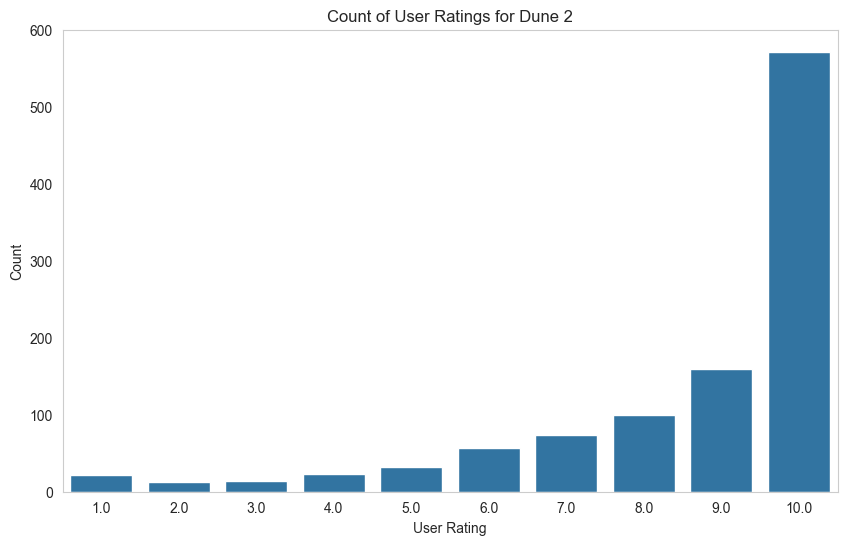

In [16]:
# Creating a graph for user ratings ranging from 1 to 10

# Setting up the plot
plt.figure(figsize=(10, 6))

# Plotting the distribution of user ratings again for clarity, as requested
sns.countplot(data=dune_2_reviews_df, x='User Rating')
plt.title('Count of User Ratings for Dune 2')
plt.xlabel('User Rating')
plt.ylabel('Count')
plt.grid(axis='y')

# Displaying the plot
plt.show()
